# Econometría básica con Python
## Estadística descriptiva

**Fabián Alejandro Triana Alarcón**

fatrianaa1@gmail.com / fatrianaa@unal.edu.co

Economista. Estudiante de Especialización en Estadística

Universidad Nacional de Colombia


## Preparación del entorno:
Antes de iniciar con la ejecución de las tareas planeadas, se debe contar con las herramientas requeridas en dicho proceso; para esto, se debe llevar a cabo la importación de las librerías *pandas* (datos y resúmenes estadísticos básicos), *NumPy* (matemática), *matplotlib* (gráficos) y *Seaborn* (gráficos especializados en estadística).

La importación se efectúa empleando la palabra reservada `import` y la asignación de un alias (que permite identificar fácilmente cada librería y aumentar la legibilidad del código) se lleva a cabo con la palabra reservada `as`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de los datos:

Las funciones de la familia **`read_...(...)`** de *pandas* permiten importar datos en distintos formatos (.csv, .txt, .xls, etc). En este caso, se trata de un archivo .txt que está delimitado por espacio de tabulador (el cual se identifica como "\t"):

In [2]:
data = pd.read_csv("GujaratiPorter71.txt", delimiter="\t")

El dataset que se emplea es el del Ejemplo 7.1, *Mortalidad infantil en relación con el PIB per cápita y la tasa de alfabetización de las mujeres*, de **Gujarati y Porter** (2010). 

El objeto generado por la función `read_csv(...)` de *pandas* es un `DataFrame`, el cual cuenta con sus propios métodos y atributos. Uno de estos métodos es `.head()`, el cual permite visualizar las primeras filas (las primeras 5, por defecto) del `DataFrame`:


In [3]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


## Estadística descriptiva:
Antes de llevar a cabo tareas que involucren el uso de los datos para entrenar algoritmos, realizar estimaciones, efectuar cálculos, etc., es indispensable tener una idea clara sobre sus características, de modo que se identifiquen potenciales problemas y se reduzca la probabilidad de cometer equivocaciones por un uso inadecuado de la información disponible.

En primer lugar, como parte de las tareas de reconocimiento de los datos, es útil conocer cuánta información se tiene; en el caso de una tabla, identificar cuántas filas y columnas forman el dataset y la naturaleza de los datos que almacenan.

Para conocer las dimensiones del `DataFrame` puede recurrirse al el atributo `.shape`:

In [4]:
data.shape

(64, 4)

El resultado de la aplicación del atributo `.shape` es una tupla Python **(...)** en la que se informa el número de filas y de columnas (en ese orden) que tiene el `DataFrame`; así, nuestro dataset contiene 64 filas y 4 columnas.

Ahora, sabemos que son 4 columnas, pero ¿cómo se llaman? ¿cuál es el nombre de cada una de estas 4 columnas? Cuando se ha aplicado el método `.head()` se han visualizado las primeras observaciones del dataset, incluyendo el encabezado en el que se encuentran los nombres de las columnas; sin embargo, si específicamente se quiere saber el nombre de las columnas, puede emplearse el atributo `.columns`:

In [5]:
data.columns

Index(['CM', 'FLR', 'PGNP', 'TFR'], dtype='object')

Con toda la información obtenida se sabe que el dataset con el que se trabajará tiene 64 filas y 4 columnas, y que los nombres de las columnas son "CM", "FLR", "PGNP" y "TFR". Sin embargo, aún se desconoce qué tipo de datos contienen dichas columnas, ¿se trata de palabras? ¿de números? ¿solo números enteros? Para descubrirlo, puede emplearse el atributo `.dtypes`:

In [6]:
data.dtypes

CM        int64
FLR       int64
PGNP      int64
TFR     float64
dtype: object

La información generada por el atributo `.dtypes` indica que tres variables (columnas) contienen datos de tipo `int64` (número entero) y una de tipo `float64` (número decimal).

Finalmente, una manera de obtener la información que se halla con la aplicación de los tres atributos apenas descritos es el método `.info()`, el cual permite visualizarlos en un único espacio:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CM      64 non-null     int64  
 1   FLR     64 non-null     int64  
 2   PGNP    64 non-null     int64  
 3   TFR     64 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


El resultado de la aplicación de este método es tan solo un resumen de la información que hemos obtenido previamente. Adicionalmente, se presenta el dato sobre el uso de memoria asociado, que en este caso es de 2.1 Kb; el tipo de objeto al que corresponde el dataset, el cual es un `DataFrame` de *pandas*; y el rango del índice, el cual corresponde al intervalo $[0,63]$ (es muy importante tener en cuenta que la indización en Python inicia desde 0 y no desde 1).

Para obtener estadística descriptiva de las variables numéricas del dataset se puede recurrir al método `.describe()`:

In [8]:
data.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


Tal y como observamos, el método `.describe()` nos permite obtener información estadística básica sobre las variables numéricas, lo que incluye, por ejemplo, el promedio, los valores máximo y mínimo y la desviación estándar. Así, se puede evidenciar, por ejemplo, que el valor mínimo de la variable "CM" es 12, el valor máximo de la variable "PGNP" es 19,830 y el promedio de la variable "TFR" corresponde a 5.55.

Al aplicar el método `.describe()` sobre el `DataFrame` se obtiene, por defecto, información estadística básica de todas las variables numéricas presentes en éste. Si solo se está interesado en la información de una variable en particular, esta puede ser seleccionada por medio del uso de los corchetes [ ], indicando su nombre (entre comillas) dentro de estos.

Así, si, por ejemplo, solo nos interesa la variable "CM", el código a emplear será el siguiente:

In [9]:
data["CM"].describe()

count     64.000000
mean     141.500000
std       75.978067
min       12.000000
25%       82.000000
50%      138.500000
75%      192.500000
max      312.000000
Name: CM, dtype: float64

Si, por el contrario, lo que nos interesa es un grupo de variables y no solo una, podemos seleccionarlo haciendo uso de los corchetes [ ] e incluyendo los nombres de las variables de interés (entre comillas, separados por comas) dentro de una **lista** Python […]:



In [10]:
data[["CM", "PGNP", "FLR"]].describe()

,CM,PGNP,FLR
count,64.000000,64.000000,64.000000
mean,141.500000,1401.250000,51.187500
std,75.978067,2725.695775,26.007859
min,12.000000,120.000000,9.000000
25%,82.000000,300.000000,29.000000
50%,138.500000,620.000000,48.000000
75%,192.500000,1317.500000,77.250000
max,312.000000,19830.000000,95.000000


La función `pairplot(...)` de *Seaborn* resulta particularmente útil para el contexto en el que nos encontramos; esta función crea una cuadrilla en la que podremos visualizar la relación que existe entre pares de variables (por medio de diagramas de dispersión) y la distribución de cada una de estas (por medio de histogramas):

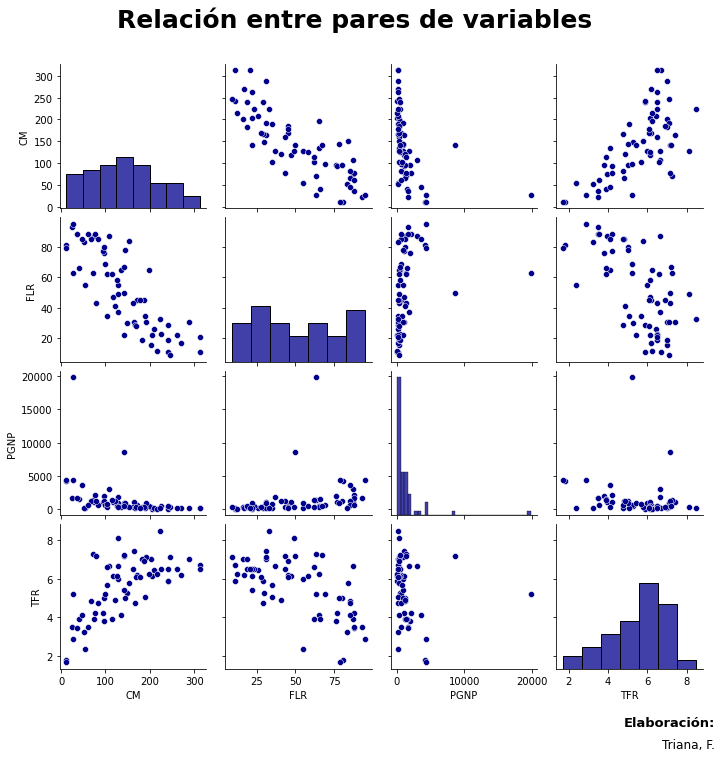

In [11]:

g = sns.pairplot(data, plot_kws = {"color": "darkblue"}, 
             diag_kws = {"color":"darkblue"})
g.fig.suptitle("Relación entre pares de variables", 
               fontsize = 25, 
               fontweight = "bold")
plt.subplots_adjust(top=0.9)
g.fig.text(1,-.02,
         "Elaboración:",
          fontsize = 13, fontweight = "bold",
          ha = "right")
g.fig.text(1,-.05,
         "Triana, F.",
          fontsize = 12, ha = "right")
plt.show()

En la diagonal se observa la distribución de cada una de las variables, mientras que en los diagramas de dispersión se encuentra la relación entre pares de estas; así, se puede observar que, por ejemplo, el ingreso se concentra en valores inferiores a 5000 y existe una relación negativa entre la tasa de alfabetización de las mujeres y la mortalidad infantil.

En estos momentos ya se cuenta con información básica sobre las variables del dataset y hemos adelantado una breve inspección visual de las relaciones que se presentan entre estas; ahora, se puede hacer uso de este conocimiento para obtener expresiones más concretas de dichas relaciones, examinándolas desde un punto de vista un tanto más técnico: en la siguiente sección se abordará el tema de la regresión lineal por el método de Mínimos Cuadrados Ordinarios.